In [1]:
##### Dift Corrector 
##### 3/7/2022
##### Author: SA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import decimal

In [3]:
def drift_corrector(data):
    df = data
    df1 = df.iloc[:,1:4]
    df2 = df1.groupby(['frame']).mean().reset_index()# calculates the center of masss at each time step (frame)
    x_list = df2['x']
    #print(df2)
    y_list = df2['y']
    t_list = df2['frame']
    x_new, y_new = [], []
    for i in range(df.shape[0]):
        frame = df.iloc[i,1] # frame
        x_n = df.iloc[i,2]-x_list[frame] # substract the centre of mass position - this assumesa all frames are present
        y_n = df.iloc[i,3]-y_list[frame] #  
        x_new.append(x_n)
        y_new.append(y_n)

    df_new = df.iloc[:,0:2]
    #df['x_corrrected'] = x_new
    #df['y_corrected'] = y_new
    df_new['x'] = x_new
    df_new['y'] = y_new
    df_new.to_csv('df_drift_corrected_short_SA.csv', index = False)           
    #df.to_csv('df_drift_corrected_SA', index = False)
    return(df_new.head())

In [4]:
def drift_checker(data):
    df = data
    df1 = df.iloc[:,1:4]
    df2 = df1.groupby(['frame']).mean().reset_index()
    x_list = df2['x']
    y_list = df2['y']
    t_list = df2['frame']
    x_drift = [ x_list[i+1] - x_list[i] for i in range(df2.shape[0]-1)]
    y_drift = [ y_list[i+1] - y_list[i] for i in range(df2.shape[0]-1)]
    x_drift = [0]+x_drift
    y_drift = [0]+y_drift
    df_ans = pd.DataFrame()
    df_ans['frame'], df_ans['x_drift'], df_ans['y_drift'] = t_list, x_drift, y_drift
    return(df_ans)
    

In [5]:
### check if Kamlesh's data have drift
df_without = pd.read_excel('without_dc.xlsx') # his data without his drift correction
df_with = pd.read_excel('with_dc.xlsx') # his data after his drift correction

df_without.head()

,particle,frame,x,y,size,distance,distance(um)
0,3,0,450.0,218.0,48,NaN,NaN
1,3,1,453.0,222.0,64,NaN,NaN
2,3,3,451.5,218.0,42,NaN,NaN
3,3,5,448.5,217.5,35,1.581139,0.012353
4,12,0,395.5,267.0,42,NaN,NaN


In [6]:
drift_checker(df_without)

,frame,x_drift,y_drift
0,0,0.000000,0.000000
1,1,13.561494,-0.650000
2,2,-4.028261,12.602899
3,3,5.108892,-11.209655
4,4,6.208876,-1.653737
5,5,-5.517536,-8.049733
6,6,14.415711,10.727619
7,7,4.632689,-3.832206
8,8,-2.968489,-15.265830
9,9,-27.562666,37.139469


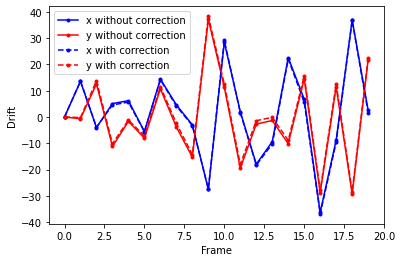

In [7]:
ax = plt.axes()

df_without_driftc = drift_checker(df_without)
df_with_driftc = drift_checker(df_with)

two,xdrift_wo,ydrift_wo = df_without_driftc['frame'], df_without_driftc['x_drift'], df_without_driftc['y_drift']
tw,xdrift_w,ydrift_w = df_with_driftc['frame'], df_with_driftc['x_drift'], df_with_driftc['y_drift']

ax.plot(two, xdrift_wo, color = 'b', marker = '.')
ax.plot(two, ydrift_wo, color = 'r', marker = '.')

ax.plot(tw, xdrift_w, color = 'b', marker = '.', linestyle = '--')
ax.plot(tw, ydrift_w, color = 'r', marker = '.', linestyle = '--')

plt.legend(['x without correction', 'y without correction', 'x with correction', 'y with correction'])
ax.set_xlim(xmax= 20)
ax.set_xlabel('Frame')
ax.set_ylabel('Drift')
plt.savefig('drift_calculation_before_my_correction')
plt.show()

In [8]:
## so the above plot shows that there is a lot of drift and the 'correction' is not working

In [9]:
## my correction
drift_corrector(df_without) # this corrects the drift and saves the data

,particle,frame,x,y
0,3,0,179.844828,-48.250000
1,3,1,169.283333,-43.600000
2,3,3,166.702703,-48.993243
3,3,5,163.011364,-39.789773
4,12,0,125.344828,0.750000


In [10]:
## Now check if the drift is gone

df_check = pd.read_csv('df_drift_corrected_short_SA.csv')
df_check.head()

,particle,frame,x,y
0,3,0,179.844828,-48.250000
1,3,1,169.283333,-43.600000
2,3,3,166.702703,-48.993243
3,3,5,163.011364,-39.789773
4,12,0,125.344828,0.750000


In [11]:
new_df = drift_checker(df_check)
new_df

,frame,x_drift,y_drift
0,0,0.000000e+00,0.000000e+00
1,1,3.634385e-15,2.131628e-14
2,2,-4.206619e-14,-4.836711e-15
3,3,2.388654e-14,6.373019e-15
4,4,-5.154221e-15,-1.899285e-14
5,5,-1.111668e-14,-2.453007e-14
6,6,3.728243e-14,-1.442430e-14
7,7,1.887915e-14,3.246299e-14
8,8,-4.822268e-14,2.641190e-14
9,9,1.508724e-14,4.975822e-15


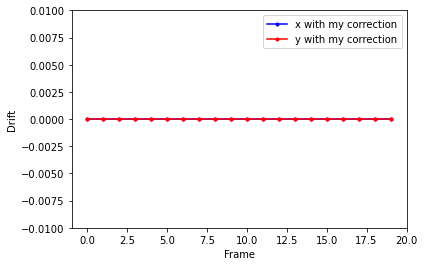

In [12]:
## you can see all the drift are practically 0
## to plot

ax = plt.axes()
ax.plot(new_df['frame'], new_df['x_drift'],  color = 'b',  marker = '.')
ax.plot(new_df['frame'], new_df['y_drift'], color = 'r',  marker = '.')

ax.set_xlim(xmax= 20)
ax.set_xlabel('Frame')
ax.set_ylabel('Drift')
ax.set_ylim(-0.01,0.01)
plt.legend(['x with my correction', 'y with my correction'])
plt.savefig('drift_check_after_my_correction')
plt.show()